# Regression

Petit notebook pour se remettre en tête les différentes méthodes de régression en passant par différentes librairies. NUMPY, PANDAS, SCI-KIT LEARN... 

C'est purement éducatif et très imparfait.

- Auteur: G. Sainton
- Date : 12/2022
- Dépendances : numpy, scipy, pandas, sciki-learn, matplotlib et seaborn 

- Version : 1.0

## Regression linéaire

On va commencer par la régression la plus simple.
comme son nom l'indique, la régression linéaire tente de capturer la relation linéaire entre le prédicteur (un groupe de variables d'entrée) et la variable que nous voulons prédire.


$\hat{y} = \theta_0 + \theta_1 x_1$


In [39]:
%reset -f

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Générer des données 
np.random.seed(42) 
nb_sample = 1000

x = 2 * np.random.rand(nb_sample) 
y = 4 + 3 * x + np.random.rand(nb_sample) 

x_b = np.c_[np.ones((nb_sample,1)), x] #for intercept 

## Regression avec numpy.linalg.lstsq

In [40]:
# Calculer avec une méthode classique de moindre carré
#A = np.vstack([x_b, np.ones(len(x_b))]).T
m, c = np.linalg.lstsq(x_b, y, rcond=None)[0]

print(m,c)

4.492645477294735 3.0146574561697723


## Regression avec la formule analytique

Pour une équation normale, c'est assez simple puisqu'il y a une formule analytique


$$\hat{\theta} = (X^T X)^{-1}X^Ty$$


In [41]:
# Calculer avec l'équation normale 
theta_hat = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) 
print(theta_hat) 

[4.49264548 3.01465746]


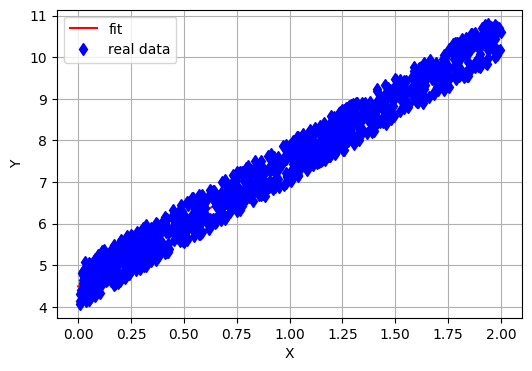

In [42]:
# Créer une ligne de régression 
x_new = np.array([[0], [2]]) 
x_new_b = np.c_[np.ones((2,1)), x_new] 
y_new = x_new_b.dot(theta_hat) 

# Tracer la régression ligne 
plt.figure(figsize=(6, 4))
plt.grid(True)
plt.plot(x_new, y_new, 'r-', label="fit") 
plt.plot(x,y,'bd', label="real data") 
plt.xlabel('X') 
plt.ylabel('Y')
plt.legend()


## Regression linéaire avec Pandas

,toto,tutu,titi
0,0.749080,1.0,6.432374
1,1.901429,1.0,10.246187
2,1.463988,1.0,9.264909
3,1.197317,1.0,8.324176
4,0.312037,1.0,5.742673
...,...,...,...
995,0.183164,1.0,5.206448
996,1.834627,1.0,10.460496
997,0.273637,1.0,4.889870
998,1.900475,1.0,9.758479


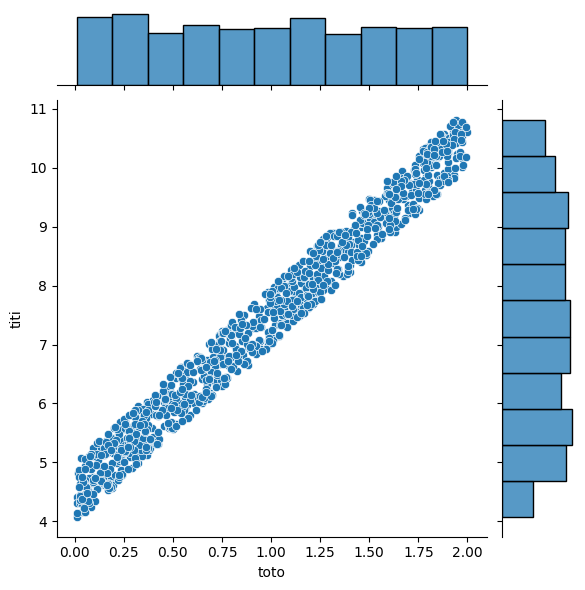

In [43]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame()

df["toto"] = x_b[:,1].tolist()
df["tutu"] = x_b[:,0].tolist()
df["titi"] = y.tolist()

display(df)

sns.jointplot(x='toto',y='titi', data=df)
plt.show()

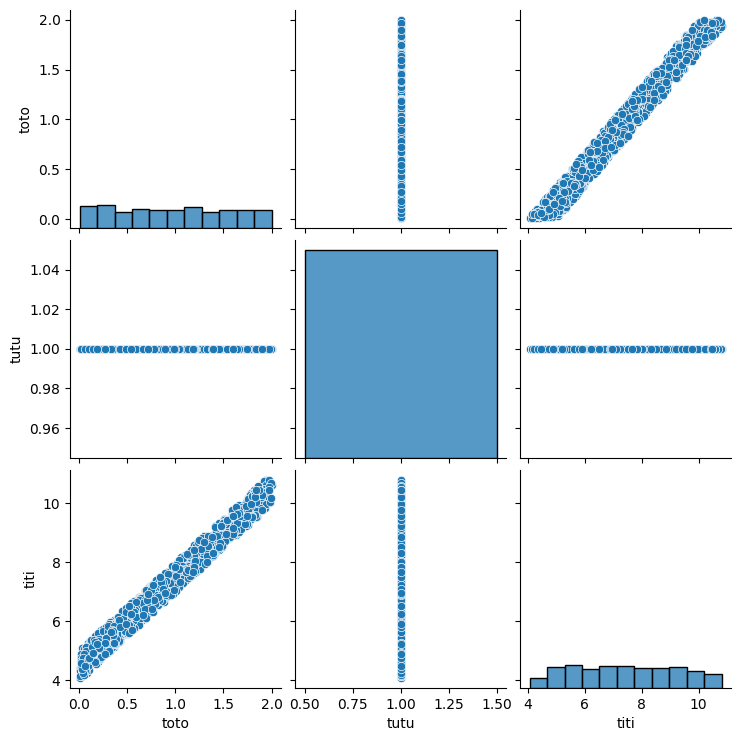

In [44]:
sns.pairplot(data=df)

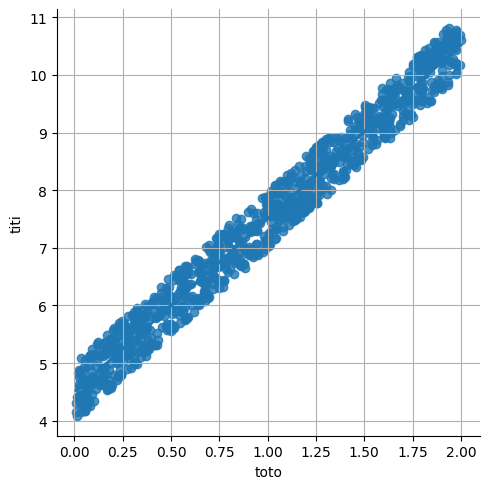

In [45]:
sns.lmplot(x='toto',y='titi',data=df, fit_reg=True, legend=True)
plt.legend
plt.grid(True)
plt.show()

## Utiliser Scikit learn pour une regression linéaire

Il va donc falloir séparer notre set de données en set de training et set de test
A deux paramètres, cela ne représente absolument aucun intérêt, mais ça se fait... 

- La métrique est une valeur que nous utilisons pour évaluer les performances de notre droite de régression (c'est-à-dire quelle est la qualité de la droite ajustée produite par le modèle pour capturer le modèle de nos données).

- La fonction de coût est une valeur que notre modèle de régression tente de minimiser pendant l'entraînement (c'est-à-dire avec l'algorithme de descente de gradient)





### MSE : Mean Square Error - Erreur Quadratique moyenne

Elle mesure la qualité de l'ajustement de notre droite de régression en mesurant la somme des carrés de l'erreur de prédiction réalisée par notre droite de régression, comme vous pouvez le voir dans l'équation ci-dessous.


$$MSE = \frac{1}{N} \sum_{i=1}^{i=N}(y_i-\hat{y}_i)^2$$


D’après l’équation ci-dessus, nous pouvons voir que plus la différence entre la valeur réelle et la valeur prédite est grande, plus le MSE serait grand. Un petit MSE signifie que notre ligne de régression a fait du bon travail en prédisant la valeur de nos points de données et vice versa.

Il y a deux raisons pour lesquelles nous devons mettre au carré la différence entre la valeur réelle et prédite de chacun de nos points de données selon l'équation ci-dessus :

1. Pour nous assurer que nous avons une valeur d'erreur positive
2. Pour « punir » le modèle de régression lorsque l'erreur est importante

### RMSE : Root Mean Square Error

Comme son nom l'indique, l'erreur quadratique moyenne (RMSE) est une extension de MSE. Il s'agit essentiellement d'une racine carrée de MSE, comme vous pouvez le voir dans l'équation ci-dessous.

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{i=N}(y_i-\hat{y}_i)^2}$$

Utiliser cette metrique assure que les unités de l'erreur sont les mêmes que les unités de la valeur que nous voulons prédire.


### MAE : Mean Absolute Error - Erreur absolue moyenne

L'erreur absolue moyenne (MAE) est également l'une des métriques les plus courantes pour un problème de régression, car elle a la même unité que la valeur que nous voulons prédire, tout comme le RMSE.

Ce qui différencie MAE des deux autres mesures ci-dessus, c'est la façon dont il accumule l'erreur. Contrairement à MSE et RMSE, MAE n'amplifie pas l'erreur de prédiction en mettant au carré la différence entre la valeur réelle et prédite de chaque point de données.

$$MSE = \frac{1}{N} \sum_{i=1}^{i=N}|y_i-\hat{y}_i|$$



In [46]:
df.describe()

,toto,tutu,titi
count,1000.000000,1000.0,1000.000000
mean,0.980513,1.0,7.448557
std,0.584275,0.0,1.785438
min,0.009264,1.0,4.075226
25%,0.471947,1.0,5.890990
50%,0.993615,1.0,7.440348
75%,1.488639,1.0,8.968358
max,1.999435,1.0,10.807127


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

X_df = df.drop(columns=['titi'])  # Replace 'target_column' with the actual target column name
Y_df = df['titi']

# Create the train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3,random_state=42)

# Creating an Instance of LinearRegression model
lm = LinearRegression()

# Train/fit on the training data
lm.fit(X_train, Y_train)

# The coefficients/slopes of model
print(lm.coef_)
print(lm.intercept_)

prediction = lm.predict(X_test)

print('MAE= ', metrics.mean_absolute_error(Y_test,prediction) )
print('MSE= ', metrics.mean_squared_error(Y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))




[3.02798956 0.        ]
4.489204964938368
MAE=  0.2579706977381723
MSE=  0.0869359645515165
RMSE: 0.2948490538419896


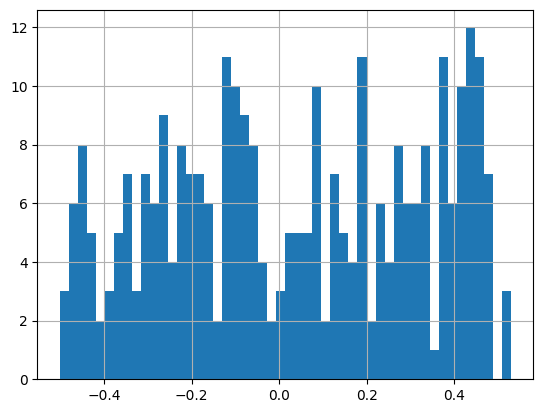

In [48]:
plt.hist(prediction-Y_test,bins=50)
plt.grid(True)
plt.show()

# Régression polynomiale

Jusqu'à présent, nous avons vu comment un modèle de régression linéaire produit une droite de régression droite qui s'adapte à nos données en minimisant la fonction de coût.

Bien que le modèle soit appelé régression linéaire, il peut en réalité produire plus qu’une simple ligne droite. Il peut également produire une ligne courbe au cas où vous souhaiteriez ajuster le modèle sur des données non linéaires, par exemple comme suit :

Commençons par produire des données quadratiques à titre d'exemple et représentons les données. Ce n'est pas très différent de ce qu'on a fait pour la régression linéaire


In [11]:
np.random.seed(42) 

nb_pts = 1000
x = 10 * np.random.rand(1000) - 5
y = x**2 + np.random.randn(1000)*x

df_RP = pd.DataFrame()
df_RP["x"] = x.tolist()
df_RP["y"] = y.tolist()

display(df_RP)

,x,y
0,-1.254599,1.351075
1,4.507143,14.295751
2,2.319939,6.264155
3,0.986585,1.575744
4,-3.439814,9.906743
...,...,...
995,-4.084179,22.071729
996,4.173136,14.862067
997,-3.631814,13.324581
998,4.502374,18.338489


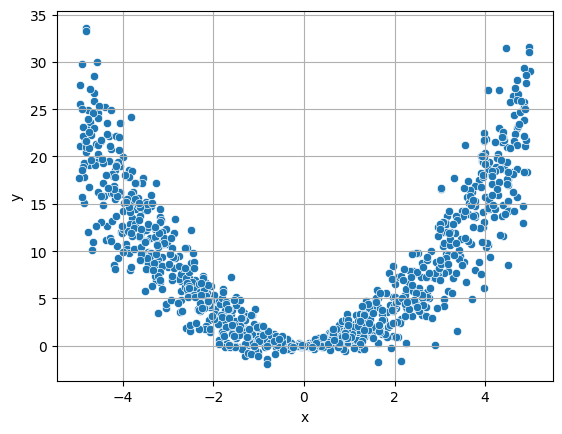

In [12]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_RP, x="x", y="y")
plt.grid(True)

4.511838999677645 [ 2.98897895e+00 -2.95082942e-03]


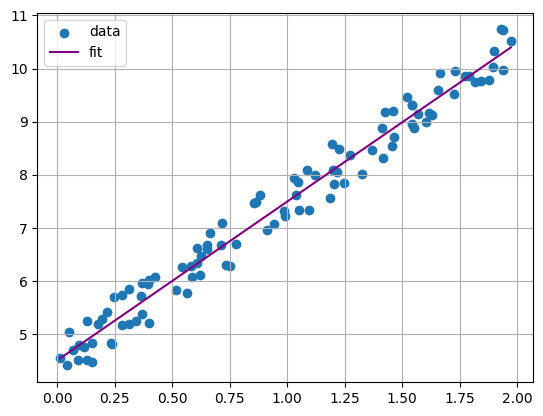

In [36]:
from sklearn.preprocessing import PolynomialFeatures
import operator

poly_features = PolynomialFeatures (degree = 2, include_bias = False) 

# reshape(1, -1) converts the 1D array into a 2D array with one row and 
# as many columns as needed to accommodate all the elements.
x_2 = x.reshape(-1, 1)
x_poly = poly_features.fit_transform (x_2)

lin = LinearRegression()
lin.fit(x_poly, y)

# Sort value before plotting
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,lin.predict(x_poly)), key=sort_axis)
x_pred, y_pred = zip(*sorted_zip)

#display model coefficients
print(lin.intercept_, lin.coef_)
#print(lin.score(X_train, Y_train))
"./images/img_IoU.png"
#create scatterplot of x vs. y
plt.scatter(x, y, label="data")

#add line to show fitted polynomial regression model
plt.plot(x_pred, y_pred, color='purple', label="fit")
plt.grid(True)
plt.legend()
plt.show()

## Compromis biais-variance

Bon là évidemment, on a simulé des données de degré 2, et on a directement ajusté un polynome de même degré. Mais quand on ne connait pas les données, on pourrait être tenté de vouloir ajusté un polynome d'un autre degrée. 
Si on augmente le dégré, on va avoir une courbe ajustée qui va suivre de plus les points. Mais pour des raisons évidentes, elle ne sera pas assez générale si nous venions à avoir plus de points (de mesure par exemple). On se retrouve dans une situation de **surapprentissage**. 

On a deux cas quand on ajuste des données justement : 

- Le sous-ajustement : Le modèle est incapable de captuer correctement le comportement des points d'entrainement. 
- Le sur-ajustement : Le modèle s'ajuste très bien aux données d'entrainement mais sera incapable de généraliser avec l'arrivée de nouveau point. 

On arrive donc à deux notions très importantes dans les statistiques : 

- **Le biais** mesure la différence entre la prédiction moyenne de notre modèle d'apprentissage automatique et la valeur réelle des points de données que nous essayons de prédire. Si notre modèle produit un biais élevé, cela signifie qu'il est trop simple pour capturer le modèle de nos données. Et cela signifie que nous avons un cas de sous-apprentissage .

- **La variance** mesure la propagation de la prédiction du modèle pour un point de données donné. Si notre modèle produit une variance élevée sur un point de données invisible, cela signifie que notre modèle est très sensible aux petits changements dans les données d'entraînement car il essaie trop de suivre le modèle de nos données d'entraînement. Et cela signifie que nous avons un cas de surapprentissage .


## Modèles régularisés

La régularisation est une technique que nous pouvons mettre en oeuvre pour lutter contre le surapprentissage. Cette technique ajoute une contrainte supplémentaire au poids de chaque prédicteur.

Il existe trois types de modèles linéaires régularisés couramment appliqués dans la pratique : **Ridge Regression**, **Lasso Regression** et **Elastic Net**.


### Ridge regression

Ridge Regression a un terme supplémentaire dans sa fonction de coût par rapport à la régression linéaire régulière, comme vous pouvez le voir dans l'équation suivante :

$$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^N \theta_i^2$$

Avec 

- $\alpha$: un hyperparamètre qui contrôle le niveau régularisatoin de la regression linéaire
- $\theta_i$: le poids de chaque prédicteur

On est sur une régularisation de type $\mathcal{L}^2$ aussi appelée régularisation de Tikhonov. 


L'objectif principal de ce terme supplémentaire est de maintenir les poids de notre modèle à un faible niveau pendant le processus de formation.

Si vous définissez $\theta$ à $0$, alors cette régression Ridge est une régression linéaire régulière. Mais si nous fixons $\alpha$ à un grand nombre, alors tous les poids deviennent très proches de zéro. Cela transformera la ligne ajustée en une ligne plate passant par la valeur moyenne des points de données.

Regardons cela sur un exemple  en reprenant les données de la regression linéaire du début 


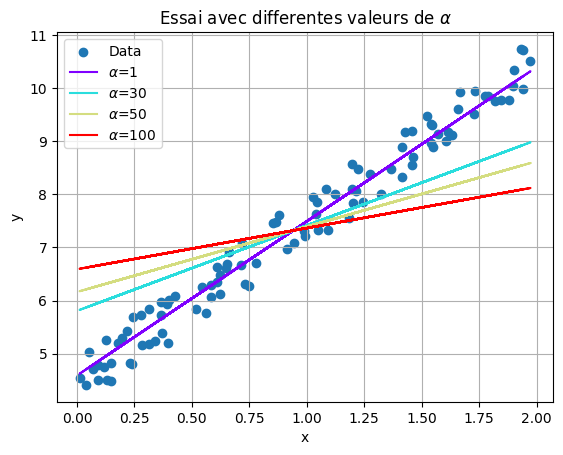

In [28]:
from sklearn.linear_model import Ridge
from matplotlib.pyplot import cm

# Générer des données 
np.random.seed(42) 
nb_sample = 100

x = 2 * np.random.rand(nb_sample)
y = 4 + 3 * x + np.random.rand(nb_sample) 

## Partie plot

# Petit iterateur de couleur pour le plot
color = iter(cm.rainbow(np.linspace(0, 1, 4)))

plt.scatter(x, y, label="Data")

# Pour faire le test sur différent coef alpha
for i in [1, 30, 50, 100]:
    ridge_1 = Ridge(alpha=i, solver="cholesky")
    ridge_1.fit(x.reshape(-1, 1),y)
    plt.plot(x, ridge_1.predict(x[:, np.newaxis]), label=r'$\alpha$'+f'={i}', color=next(color))

plt.legend()
plt.grid(True)
plt.title(r"Essai avec differentes valeurs de $\alpha$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### LASSO regression

La régularisation LASSO (Least Absolute and Selection Operator) est une régularisation de type $\mathcal{L}^1$

$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^N |\theta_i|$$

C'est une régularisation très similaire à la régularisation Ridge. La différence est qu'au lieu de mettre au carré le poids de chaque prédicteur (norme $\mathcal{L}^2$), nous utilisons plutôt l'opérateur abs (norme $\mathcal{L}^1$).


L’intuition est toujours la même que celle de Ridge Regression. Si vous définissez α à zéro, nous nous retrouvons avec une régression linéaire régulière. Pendant ce temps, si nous définissons α sur un grand nombre, nous obtenons alors une ligne plate qui traverse la valeur moyenne de nos données.


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x,y)

### Elastic Net (filet élastique)

Elastic Net peut être considéré comme un compromis entre une régression Ridge et une régression Lasso, comme vous pouvez le voir dans l'équation de la fonction de coût ci-dessous.

$$J(\theta) = MSE(\theta) +  r\alpha\sum_{i=1}^N |\theta_i| + \alpha\frac{1-r}{2}\sum_{i=1}^N \theta_i^2 $$

En général, il est préférable éviter une régression linaire simple. La régression ridge est un bon choix par défaut mais si vous soupçonner que seulement quelques variables sont utiles, il est préférable d'utiliser une regression LASSO ou ELASTIC NET




In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(x, y)

## Regression avec les SVM (Support Vector Machine)

Si le SVM est plus couramment utilisé pour les problèmes de classification, il est aussi possible de les utiliser pour des problèmes de regression linaire

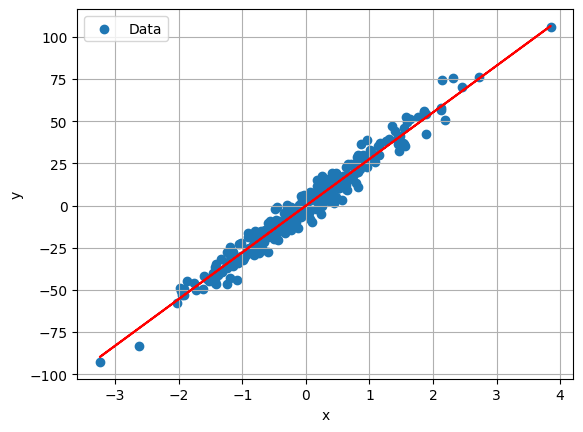

In [63]:
# This time we will use the scikit function to generate a random a dataset

from sklearn.datasets import make_regression
from sklearn.svm import SVR

xnew, ynew = make_regression(n_samples=300, n_features=1, noise=5, random_state=42)

svr = SVR(kernel = 'linear', epsilon = 0.1)
svr.fit(xnew,ynew.ravel())

plt.scatter(xnew, ynew, label="Data")
plt.plot(xnew, svr.predict(xnew), 'r-')
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

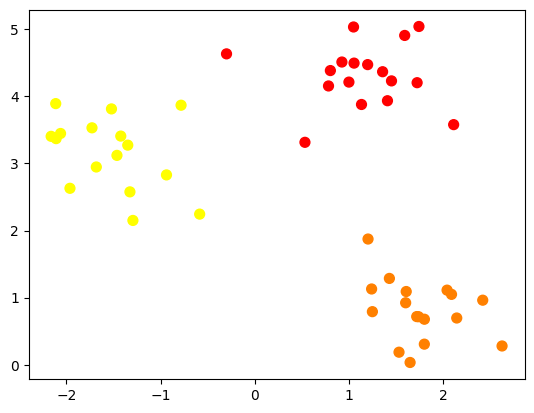

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=3,
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
